# Implement the Spectrogram from scratch in python

https://fairyonice.github.io/implement-the-spectrogram-from-scratch-in-python.html

## Generate synthetic dial tones

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

%matplotlib inline

In [9]:
def get_signal_Hz(nu, sample_rate, length_ts_sec):
    t = np.linspace(0, 1.0 * length_ts_sec, sample_rate * length_ts_sec)
    return np.sin(2 * np.pi * nu * t)

sample_rate = 4000
length_ts_sec = 3
ts = [
    (get_signal_Hz(697, samples, length_ts_sec)
     + get_signal_Hz(1209, sample_rate, length_ts_sec)),
    np.zeros((samples * 2,)),
    (get_signal_Hz(697, samples, length_ts_sec)
     + get_signal_Hz(1336, sample_rate, length_ts_sec))
]
ts = np.concatenate(ts)

In [10]:
Audio(ts, rate=sample_rate)

In [15]:
t = np.arange(sample_rate * 8)
t = t / max(t) * 8

Text(0, 0.5, 'Amplitute')

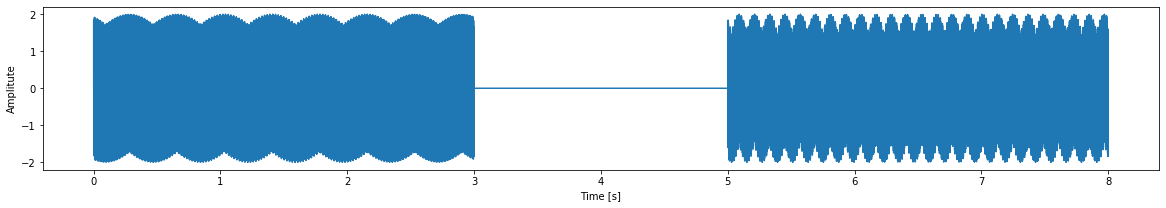

In [17]:
plt.figure(figsize=(20, 3))
plt.plot(t, ts)
plt.xlabel('Time [s]')
plt.ylabel('Amplitute')

## Discrete Fourier Transform

### DFD on the entire signal

* Nyquest frequency

https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html

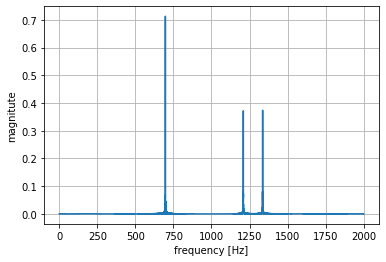

In [19]:
from scipy.fft import fft

N = sample_rate * 8  # samples
T = 1.0 / sample_rate  # delta samples
tsf = fft(ts)
tf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
plt.plot(tf, 2.0 / N * np.abs(tsf[0:(N // 2)]))
plt.xlabel('frequency [Hz]')
plt.ylabel('magnitute')
plt.grid()

Text(0, 0.5, 'Frequency [Hz]')

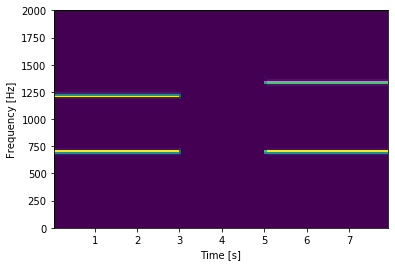

In [24]:
from scipy import signal

fspec, tspec, Sxx = signal.spectrogram(ts, sample_rate)
plt.pcolormesh(tspec, fspec, Sxx)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')